# ** Telanagana Data Analysis and Visualization Project (Live Data/Project)**

## *Introduction*
Telangana, officially formed in June 2014, stands as India's youngest state. Despite its recent inception, the state has rapidly positioned itself as a significant economic powerhouse in the country. The state capital, Hyderabad, with its burgeoning IT sector and robust infrastructure, has been the driving force behind this rapid growth. However, Telangana's progress is not confined to Hyderabad alone; various districts have shown commendable development across multiple sectors, including industrial investments, transportation, and revenue generation through stamp registration.

This analysis embarks on a comprehensive exploration of Telangana's growth trajectory since its formation. Through the lens of data, we will investigate key indicators that reflect the state’s economic health and developmental strides. The analysis will cover several critical areas:
- *Stamp Registration and Revenue Growth:* An examination of the trends in stamp duty collections and registrations across districts, providing insight into real estate activity and government revenue.
- *Transportation and Infrastructure Development:* A study of the transportation sector, including vehicle registration data, the rise in electric vehicles, and public transport dynamics, highlighting the infrastructural growth and sustainability initiatives.
- *Industrial Investments and Economic Diversification:* A detailed look at the investments flowing into the state, particularly in the Pharmaceutical and Chemical sectors, and how these investments are shaping Telangana’s industrial landscape.

By delving into these areas, this project aims to provide a data-driven narrative of Telangana's growth, identifying patterns, challenges, and opportunities. This will enable policymakers, investors, and other stakeholders to better understand the factors driving Telangana’s economic engine and to craft strategies that can further accelerate the state's growth in the coming years.

## *Importance*
Data analysis and visualization are crucial in transforming raw data into meaningful insights that can drive informed decision-making. By employing advanced visualizations like pie charts and geographic maps, this project aims to present complex data in an intuitive and accessible manner. The insights derived from this analysis can be pivotal for strategic planning, identifying investment opportunities, and understanding sectoral performance.

## *Project Objectives*
- *Data Cleaning:* Ensure the data is accurate, consistent, and ready for analysis by handling missing values, transforming data types, and extracting relevant features.
- *Data Processing:* Perform exploratory data analysis (EDA) to identify patterns, correlations, and trends within the dataset.
- *Visualization:* Utilize a range of visualization techniques, including pie charts and geographic maps, to communicate the findings effectively.
- *Insight Generation:* Draw actionable insights from the analysis that can contribute to strategic business decisions.



## Context

### Table 1: Monthly Data
- **Description:** Contains data on a monthly basis with corresponding quarters and fiscal years.
- **Key Fields:**
  - Month
  - Quarter
  - Fiscal Year

### Table 2: District Codes Mapping
- **Description:** Maps district codes to their corresponding district names.
- **Key Fields:**
  - District Code
  - District Name

### Table 3: Document Registration Data
- **Description:** Provides data on document registrations, revenue generated, and rankings per district.
- **Key Fields:**
  - District
  - Number of Documents Registered
  - Revenue Generated
  - District Ranking

### Table 4: Vehicle Registration Data
- **Description:** Contains vehicle registration data segmented by various parameters such as fuel type, vehicle class, seat capacity, and category (new or pre-owned, transport or non-transport).
- **Key Fields:**
  - Fuel Type
  - Vehicle Class
  - Seat Capacity
  - Category (New/Pre-owned, Transport/Non-transport)

### Table 5: Investment and Employment Data
- **Description:** Details investments in various sectors, along with the number of employees, ranked by district and sector.
- **Key Fields:**
  - District
  - Sector
  - Investment Amount
  - Number of Employees
  - Sector Ranking


## *Additional Context*
This project also aims to serve as a learning resource for advanced data visualization techniques using Python. By integrating geographic data visualizations with GeoPandas and Folium, the project demonstrates how spatial data can provide deeper insights into trends over time and across regions.

### Import Libraries


#### Data Cleaning and Preparation:

In [36]:
import numpy as np
import pandas as pd
from datetime import timedelta
from matplotlib import pyplot as plt
import seaborn as sns

import warnings 
#Ignore all warnings 
warnings.filterwarnings("ignore")

Context:

In [6]:
df1 = pd.read_csv("C:\\Users\\HP\\Desktop\\tel\\dataset\\dim_date.csv")
df2 = pd.read_csv("C:\\Users\\HP\Desktop\\tel\\dataset\\dim_districts.csv")
df3 = pd.read_csv("C:\\Users\\HP\\Desktop\\tel\\dataset\\fact_stamps.csv")
df4 = pd.read_csv("C:\\Users\\HP\\Desktop\\tel\\dataset\\fact_transport.csv")
df5 = pd.read_csv("C:\\Users\\HP\\Desktop\\tel\\dataset\\fact_TS_iPASS.csv")

### Headers of all five tables

In [7]:
df1.head()

,month,Mmm,quarter,fiscal_year
0,4/1/2019,Apr,Q1,2019
1,5/1/2019,May,Q1,2019
2,6/1/2019,Jun,Q1,2019
3,7/1/2019,Jul,Q2,2019
4,8/1/2019,Aug,Q2,2019


In [8]:
df2.head()

,dist_code,district
0,19_1,Adilabad
1,22_2,Bhadradri Kothagudem
2,21_1,Hanumakonda
3,16_1,Hyderabad
4,20_2,Jagtial


In [9]:
df3.head()

,dist_code,month,documents_registered_cnt,documents_registered_rev,estamps_challans_cnt,estamps_challans_rev,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Document reg_rev,Rank,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,14_1,4/1/2019,4533,59236363,0,0,NaN,Mahabubnagar,NaN,Mahabubnagar,NaN,1.07,11.0,1.08,0.925926,2019,13.0
1,17_3,4/1/2019,4151,41508762,0,0,NaN,Siddipet,NaN,Siddipet,NaN,1.01,13.0,1.02,0.980392,2019,12.0
2,20_3,4/1/2019,2116,23674170,0,0,NaN,Rajanna Sircilla,NaN,Rajanna Sircilla,NaN,0.45,22.0,0.46,2.173913,2019,3.0
3,21_5,4/1/2019,1089,15915285,0,0,NaN,Mahabubabad,NaN,Mahabubabad,NaN,0.40,24.0,0.40,0.000000,2019,19.0
4,23_1,4/1/2019,6133,82593256,0,0,NaN,Nalgonda,NaN,Nalgonda,NaN,1.37,10.0,1.38,0.724638,2019,15.0


In [10]:
df4.head()

,dist_code,month,fuel_type_petrol,fuel_type_diesel,fuel_type_electric,fuel_type_others,vehicleClass_MotorCycle,vehicleClass_MotorCar,vehicleClass_AutoRickshaw,vehicleClass_Agriculture,vehicleClass_others,seatCapacity_1_to_3,seatCapacity_4_to_6,seatCapacity_above_6,Brand_new_vehicles,Pre-owned_vehicles,category_Non-Transport,category_Transport
0,15_1,01/04/19,17910,3011,76,22,15308,4429,0,4,1278,16110,4182,717,19542,1477,19856,1163
1,18_2,01/04/19,3066,306,6,0,2995,142,49,64,128,3156,189,33,3322,56,3203,175
2,20_3,01/04/19,1577,215,0,0,1546,79,29,21,117,1683,104,5,1751,41,1648,144
3,21_3,01/04/19,1961,281,2,0,1939,72,72,48,113,2082,146,16,2209,35,2075,169
4,21_7,01/04/19,1552,309,0,0,1512,76,69,109,95,1696,145,20,1820,41,1701,160


In [11]:
df5.head()

,dist_code,month,sector,investment in cr,number_of_employees,Unnamed: 5,Sector,Investment,Rank
0,14_1,1/4/2019,Engineering,2.3200,15,NaN,Engineering,5024.61,6.0
1,19_1,1/4/2019,Engineering,0.6250,13,NaN,Wood and Leather,152.40,19.0
2,20_3,1/4/2019,Wood and Leather,0.2000,8,NaN,Textiles,1844.27,15.0
3,20_3,1/4/2019,Textiles,0.2675,27,NaN,Electrical and Electronic Products,941.63,17.0
4,21_5,1/4/2019,Electrical and Electronic Products,0.1200,5,NaN,Plastic and Rubber,9649.78,3.0


Clean and Prepare the Data

Ensure that data types are correct, handle missing values, and merge DataFrames where needed.

### Data Preprocessing Steps

1. **Convert 'month' Columns to Datetime**:
   - Converts 'month' columns in `df1`, `df3`, `df4`, and `df5` to datetime format for consistent date handling.

2. **Remove Extra Spaces in Column Names**:
   - Strips leading and trailing spaces from column names in all DataFrames to prevent errors during analysis.


In [12]:
# Convert 'month' columns to datetime
df1['month'] = pd.to_datetime(df1['month'], errors='coerce')
df3['month'] = pd.to_datetime(df3['month'], errors='coerce')
df4['month'] = pd.to_datetime(df4['month'], errors='coerce')
df5['month'] = pd.to_datetime(df5['month'], errors='coerce')

# Strip leading and trailing spaces from column names
df1.columns = df1.columns.str.strip()
df2.columns = df2.columns.str.strip()
df3.columns = df3.columns.str.strip()
df4.columns = df4.columns.str.strip()
df5.columns = df5.columns.str.strip()


### Numeric Data Formatting

1. **Convert Columns to Numeric in `df3`**:
   - Converts columns like `documents_registered_cnt` and `documents_registered_rev` in `df3` to numeric format. Any non-numeric values are coerced to `NaN`.

2. **Convert Columns to Numeric in `df4`**:
   - Ensures that columns related to fuel types, vehicle classes, seat capacities, and categories in `df4` are in numeric format. Non-numeric values are coerced to `NaN`.

3. **Convert Columns to Numeric in `df5`**:
   - Converts `investment in cr` and `number_of_employees` in `df5` to numeric format, with non-numeric values coerced to `NaN`.


In [13]:
# Ensure numeric columns are properly formatted
numeric_columns_df3 = ['documents_registered_cnt', 'documents_registered_rev']
df3[numeric_columns_df3] = df3[numeric_columns_df3].apply(pd.to_numeric, errors='coerce')

numeric_columns_df4 = ['fuel_type_petrol', 'fuel_type_diesel', 'fuel_type_electric', 'fuel_type_others',
                       'vehicleClass_MotorCycle', 'vehicleClass_MotorCar', 'vehicleClass_AutoRickshaw',
                       'vehicleClass_Agriculture', 'vehicleClass_others', 'seatCapacity_1_to_3', 
                       'seatCapacity_4_to_6', 'seatCapacity_above_6', 'Brand_new_vehicles', 
                       'Pre-owned_vehicles', 'category_Non-Transport', 'category_Transport']
df4[numeric_columns_df4] = df4[numeric_columns_df4].apply(pd.to_numeric, errors='coerce')

numeric_columns_df5 = ['investment in cr', 'number_of_employees']
df5[numeric_columns_df5] = df5[numeric_columns_df5].apply(pd.to_numeric, errors='coerce')


- **Drop Rows with Missing Values**:
  - Removes rows in `df1` where `month` is missing.
  - Removes rows in `df3`, `df4`, and `df5` where `dist_code` is missing.


In [14]:
# Fill missing values or drop if necessary
df1 = df1.dropna(subset=['month'])
df3 = df3.dropna(subset=['dist_code'])
df4 = df4.dropna(subset=['dist_code'])
df5 = df5.dropna(subset=['dist_code'])


##### Merge tables based on common columns

In [15]:

df_merged = df3.merge(df2, left_on='dist_code', right_on='dist_code', how='left')
df_merged = df_merged.merge(df1, on='month', how='left')
df_merged = df_merged.merge(df4, on=['dist_code', 'month'], how='left')
df_merged = df_merged.merge(df5, on=['dist_code', 'month'], how='left')


##### Summary statistics

In [16]:

print(df_merged.describe(include='all'))


       dist_code                          month  documents_registered_cnt  \
count       1868                           1868               1868.000000   
unique        32                            NaN                       NaN   
top         15_2                            NaN                       NaN   
freq          92                            NaN                       NaN   
mean         NaN  2021-03-25 01:34:49.079229184               3967.038009   
min          NaN            2019-04-01 00:00:00                  0.000000   
25%          NaN            2020-03-01 00:00:00               1153.000000   
50%          NaN            2021-02-01 00:00:00               2194.500000   
75%          NaN            2022-03-01 00:00:00               4586.750000   
max          NaN            2023-03-01 00:00:00              31310.000000   
std          NaN                            NaN               5142.712201   

        documents_registered_rev  estamps_challans_cnt  estamps_challans_re

- **Histogram Visualization**:
  - Shows the distribution of important numeric variables in the dataset.
  - Includes counts, revenue, fuel types, vehicle types, and investments.
  - Helps spot patterns, trends, and outliers.


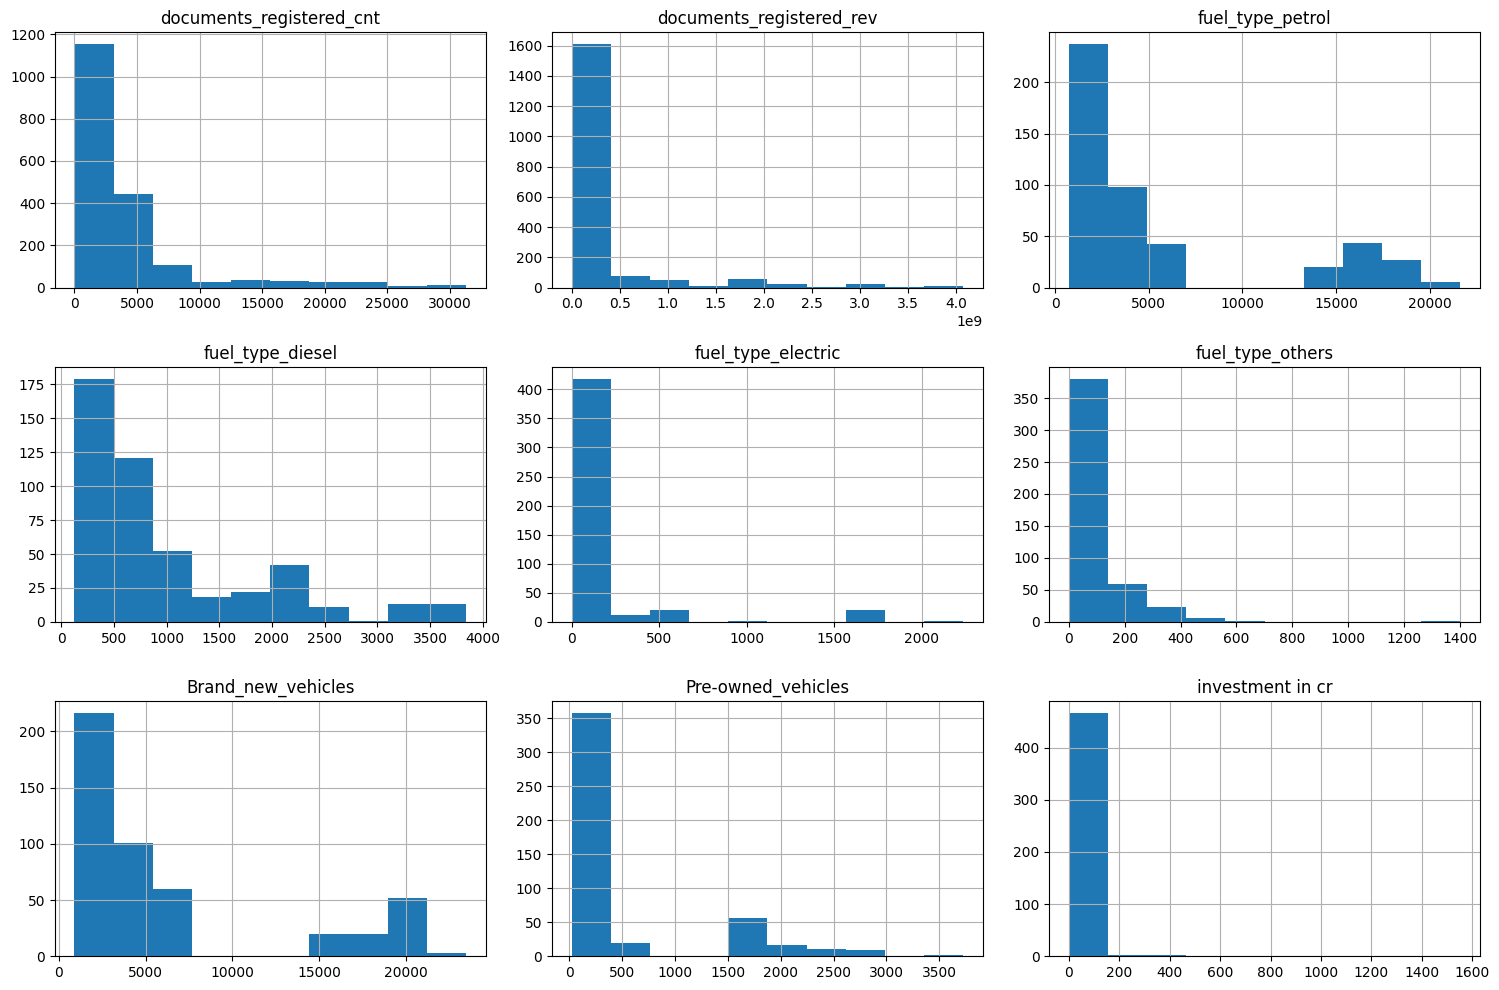

In [37]:
# Distribution of key numeric variables
df_merged[['documents_registered_cnt', 'documents_registered_rev', 'fuel_type_petrol', 
           'fuel_type_diesel', 'fuel_type_electric', 'fuel_type_others', 
           'Brand_new_vehicles', 'Pre-owned_vehicles', 'investment in cr']].hist(figsize=(15, 10))
plt.tight_layout()
plt.show()


## Extracting Numeric Columns

In [38]:
# Extract numeric columns
numeric_df = df_merged.select_dtypes(include='number')

# Display the numeric columns
print(numeric_df.columns)


Index(['documents_registered_cnt', 'documents_registered_rev',
       'estamps_challans_cnt', 'estamps_challans_rev', 'Unnamed: 6',
       'Unnamed: 8', 'Unnamed: 10', 'Document reg_rev', 'Rank_x',
       'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16',
       'fiscal_year', 'fuel_type_petrol', 'fuel_type_diesel',
       'fuel_type_electric', 'fuel_type_others', 'vehicleClass_MotorCycle',
       'vehicleClass_MotorCar', 'vehicleClass_AutoRickshaw',
       'vehicleClass_Agriculture', 'vehicleClass_others',
       'seatCapacity_1_to_3', 'seatCapacity_4_to_6', 'seatCapacity_above_6',
       'Brand_new_vehicles', 'Pre-owned_vehicles', 'category_Non-Transport',
       'category_Transport', 'investment in cr', 'number_of_employees',
       'Unnamed: 5', 'Investment', 'Rank_y', 'revenue_per_document'],
      dtype='object')


#### Compute correlation matrix

In [19]:

correlation_matrix = numeric_df.corr()
print(correlation_matrix)


                           documents_registered_cnt  documents_registered_rev  \
documents_registered_cnt                   1.000000                  0.901162   
documents_registered_rev                   0.901162                  1.000000   
estamps_challans_cnt                       0.745622                  0.839928   
estamps_challans_rev                       0.735101                  0.918765   
Unnamed: 6                                      NaN                       NaN   
Unnamed: 8                                      NaN                       NaN   
Unnamed: 10                                     NaN                       NaN   
Document reg_rev                           0.938517                  0.996805   
Rank_x                                    -0.627117                 -0.555717   
Unnamed: 13                                0.940819                  0.997933   
Unnamed: 14                                0.039816                 -0.015552   
Unnamed: 15                 

## Correlation Matrix Heatmap

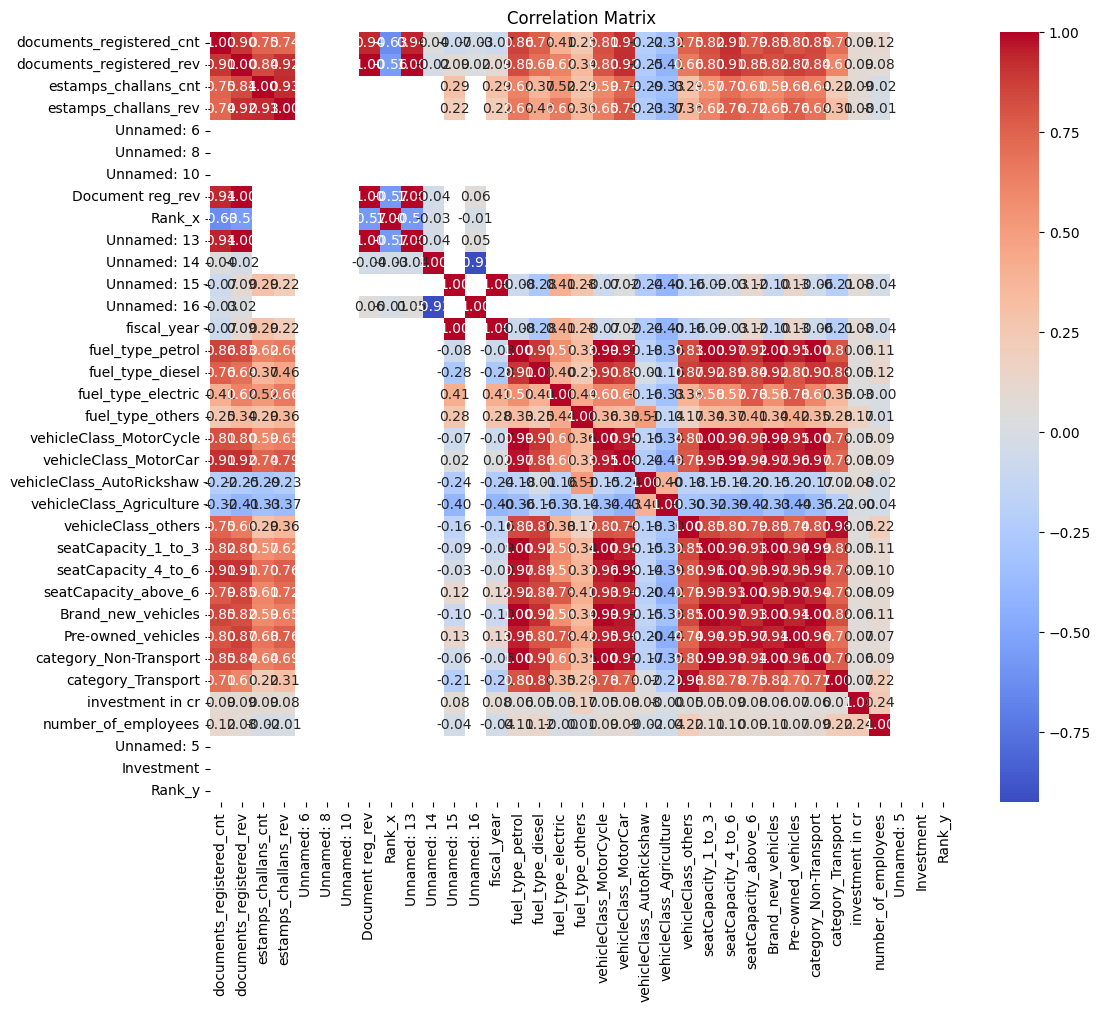

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


## 1. Document Registration Trends

### Question:
- **How do document registrations and revenues fluctuate over the months?**
- **Are there any noticeable seasonal trends or peaks in specific quarters?**

### Analysis:
- Analyze the number of documents registered and the corresponding revenue across different months and quarters.
- Identify any patterns or seasonal trends that could indicate peaks or troughs in document registrations and revenue generation.

### Visualization:
- **Type:** Line Chart or Bar Chart
- **Description:** 
  - Plot the number of documents registered over time, segmented by month and quarter.
  - Plot the corresponding revenue over time to identify any correlation with the registration trends.
- **Purpose:** 
  - To visualize trends in document registration and revenue across the months.
  - To identify any significant seasonal variations or patterns in specific quarters.


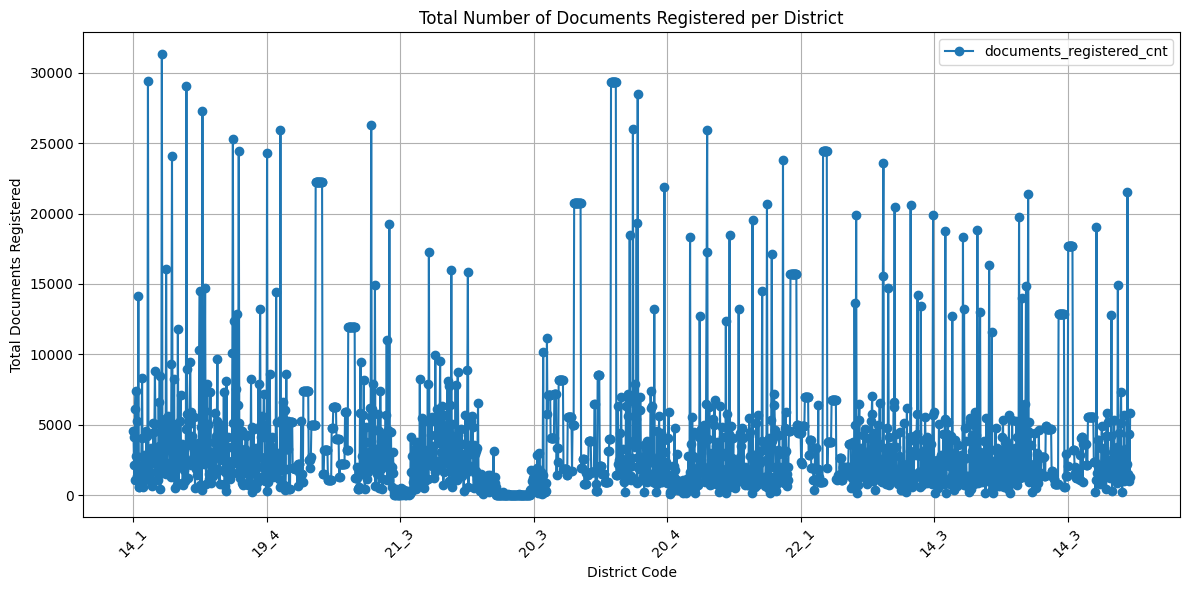

In [22]:
if 'documents_registered_cnt' in df_merged.columns and 'dist_code' in df_merged.columns:
    df_merged.plot(kind='line', x='dist_code', y='documents_registered_cnt', figsize=(12, 6), marker='o')
    plt.title('Total Number of Documents Registered per District')
    plt.xlabel('District Code')
    plt.ylabel('Total Documents Registered')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    print("Required columns for plotting are missing.")

## 2. District-wise Document Registration Performance

### Question:
- **Which districts have the highest and lowest document registration counts and revenues?**
- **How do these metrics vary across different districts?**

### Analysis:
- Rank the districts based on the number of documents registered and the revenue generated.
- Compare the performance of districts to identify which ones are leading or lagging in terms of document registration and revenue.

### Visualization:
- **Type:** Bar Chart or Heatmap
- **Description:** 
  - **Bar Chart:** Show the number of documents registered and the corresponding revenue for each district, sorted by highest to lowest.
  - **Heatmap:** Visualize the distribution of document registrations and revenue across districts, using color intensity to represent the magnitude.
- **Purpose:** 
  - To highlight the districts with the highest and lowest performance in terms of document registration and revenue.
  - To provide a comparative view of how these metrics vary across different districts.


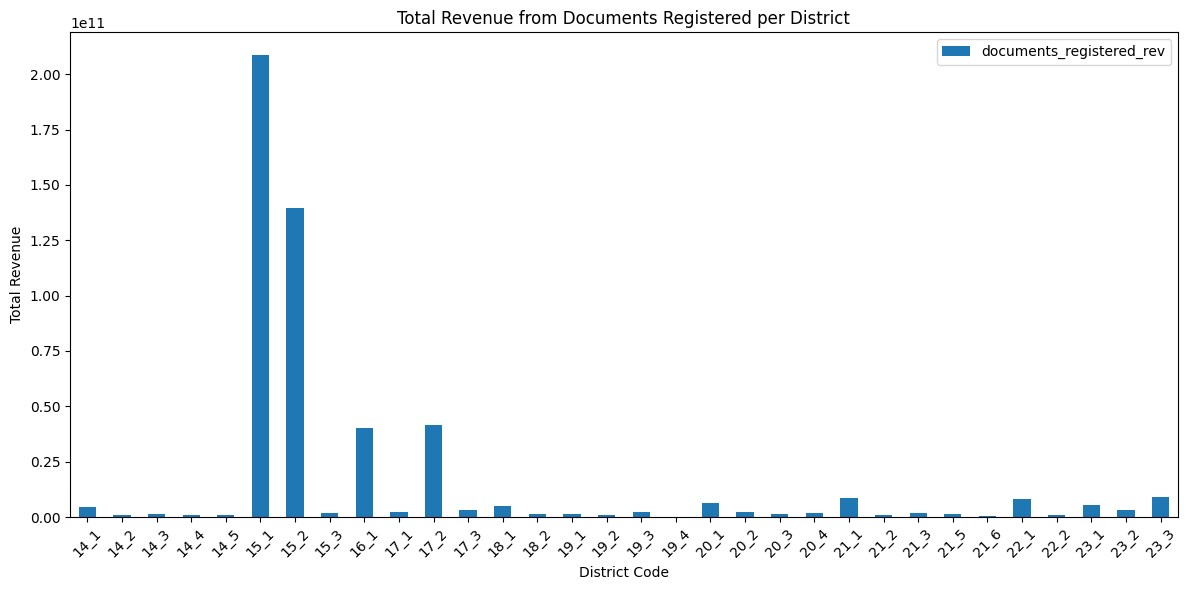

In [23]:
district_revenue = df_merged.groupby('dist_code')['documents_registered_rev'].sum().reset_index()
district_revenue.plot(kind='bar', x='dist_code', y='documents_registered_rev', figsize=(12, 6))
plt.title('Total Revenue from Documents Registered per District')
plt.xlabel('District Code')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## 3. Correlation Between Vehicle Registrations and Document Registrations

### Question:
- **Is there a correlation between the number of vehicles registered and the number of documents registered in a district?**

### Analysis:
- Calculate the correlation coefficients between the number of vehicle registrations and document registrations for each district.
- Determine the strength and direction of the relationship between these two variables.

### Visualization:
- **Type:** Bar Chart
- **Description:** 
  - Plot the number of vehicle registrations on the x-axis and the number of document registrations on the y-axis for each district.
  - Include a trendline to visualize the correlation between the two variables.
- **Purpose:** 
  - To visually assess the relationship between vehicle registrations and document registrations.
  - To identify whether districts with high vehicle registrations also tend to have high document registrations, indicating a possible correlation.


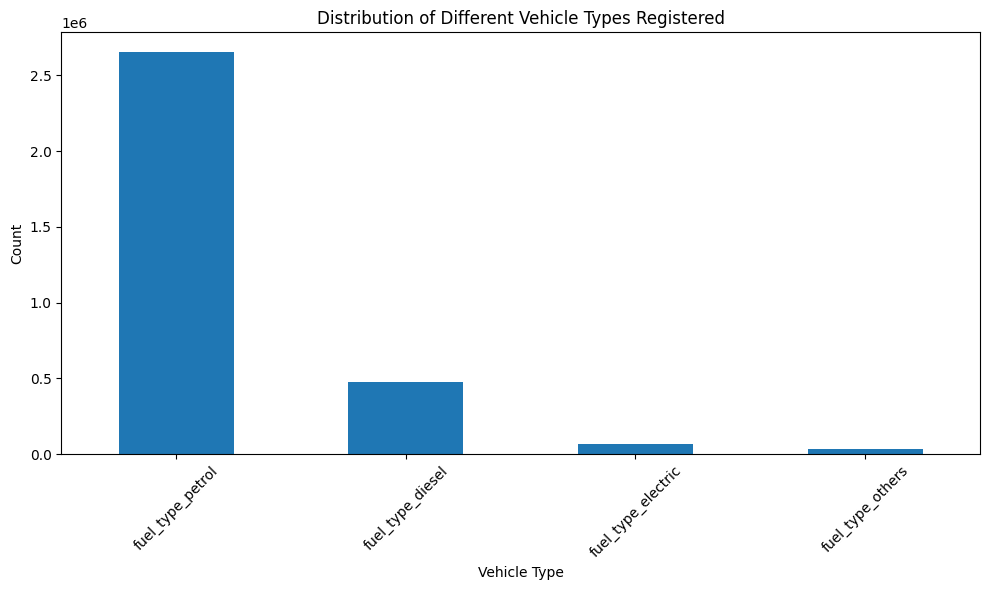

In [24]:
vehicle_types = ['fuel_type_petrol', 'fuel_type_diesel', 'fuel_type_electric', 'fuel_type_others']
vehicle_distribution = df_merged[vehicle_types].sum()
vehicle_distribution.plot(kind='bar', figsize=(10, 6))
plt.title('Distribution of Different Vehicle Types Registered')
plt.xlabel('Vehicle Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## 4. Sector-wise Investment Distribution

### Question:
- **Which sectors are attracting the most investment across the districts?**
- **How is this investment distributed geographically?**

### Analysis:
- Summarize the total investments made in each sector across all districts.
- Compare the investment distribution to identify which sectors are receiving the most attention.
- Analyze the geographical distribution of these investments across different districts.

### Visualization:
- **Type:** Pie Chart or Bar Graph
- **Description:** 
  - **Pie Chart:** Show the proportion of total investments allocated to each sector, providing a visual representation of sector dominance.
  - **Bar Graph:** Depict the total investment in each sector across districts, allowing for comparison of sector-wise investments.
- **Purpose:** 
  - To identify which sectors are leading in terms of attracting investments.
  - To understand how investment is geographically distributed across the districts and which sectors are more prominent in different regions.


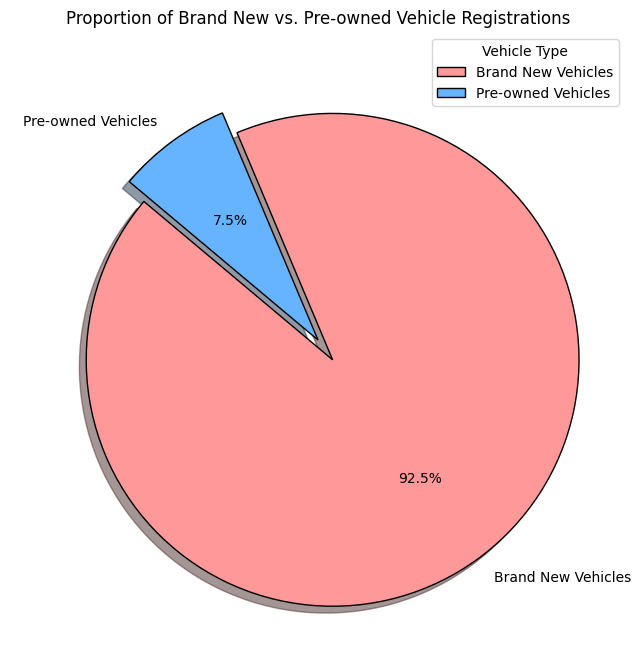

In [25]:
brand_new_total = df_merged['Brand_new_vehicles'].sum()
pre_owned_total = df_merged['Pre-owned_vehicles'].sum()
vehicle_types = ['Brand New Vehicles', 'Pre-owned Vehicles']
vehicle_counts = [brand_new_total, pre_owned_total]
colors = ['#ff9999','#66b3ff']
explode = (0.1, 0)
plt.figure(figsize=(8, 8))
plt.pie(vehicle_counts, labels=vehicle_types, autopct='%1.1f%%', startangle=140,
        colors=colors, explode=explode, shadow=True, wedgeprops={'edgecolor': 'black'})
plt.legend(vehicle_types, title="Vehicle Type", loc="upper right")
plt.title('Proportion of Brand New vs. Pre-owned Vehicle Registrations')
plt.show()


## 5. Vehicle Type Popularity

### Question:
- **What are the most popular types of vehicles being registered (e.g., motorcycles, motorcars)?**
- **How does this popularity vary by district and over time?**

### Analysis:
- Analyze the count of different vehicle types registered across various districts.
- Examine how these counts vary by district and by month to understand trends and preferences.
- Compare the popularity of different vehicle types over time to identify any shifts or patterns.

### Visualization:
- **Type:** Stacked Bar Chart or Grouped Bar Chart
- **Description:**
  - **Stacked Bar Chart:** Show the distribution of different vehicle types within each district or month, with each bar segmented to represent the proportion of each vehicle type.
  - **Grouped Bar Chart:** Display bars for each vehicle type grouped by district or month, allowing for easy comparison between vehicle types within each category.
- **Purpose:**
  - To visualize the popularity of different vehicle types across districts.
  - To identify trends and variations in vehicle type registrations over time.
  - To provide insights into the distribution and preferences of vehicle types within different regions and time periods.


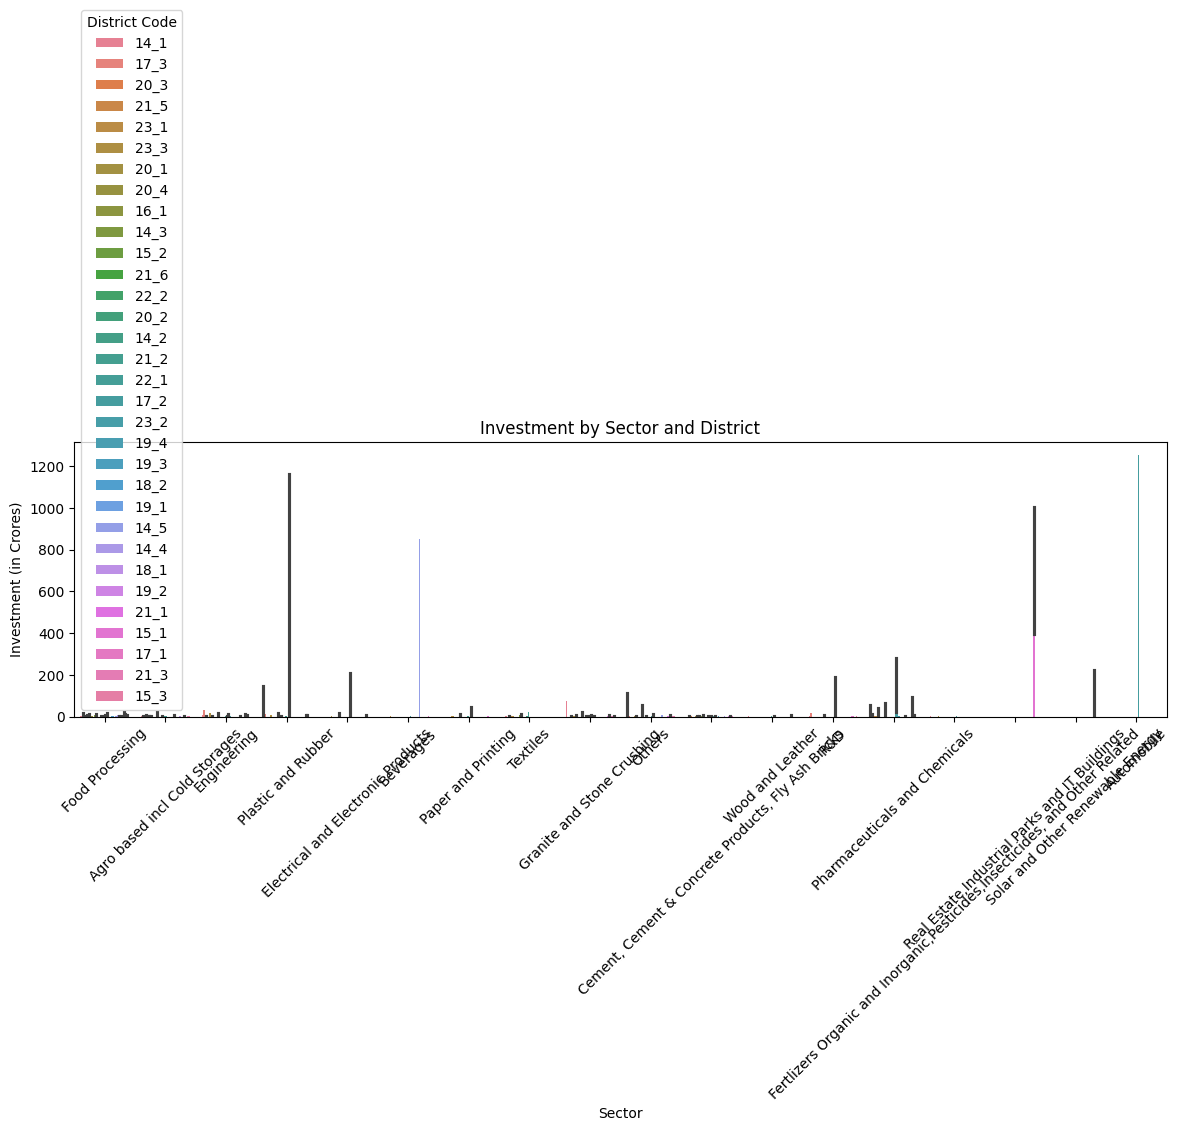

In [26]:
plt.figure(figsize=(12, 8))
sns.barplot(x='sector', y='investment in cr', hue='dist_code', data=df_merged)  # Assuming 'top_sectors' is a filtered DataFrame
plt.title('Investment by Sector and District')
plt.xlabel('Sector')
plt.ylabel('Investment (in Crores)')
plt.xticks(rotation=45)
plt.legend(title='District Code')
plt.tight_layout()
plt.show()


## 6. Impact of Investment on Employment

### Question:
- **How does investment in different sectors correlate with the number of employees in those sectors?**
- **Are districts with higher investments seeing higher employment?**

### Analysis:
- Compare the amount of investment in different sectors with the number of employees in those sectors for each district.
- Analyze whether higher investments are associated with higher employment levels in the corresponding sectors.

### Visualization:
- **Type:** Scatter Plot
- **Description:**
  - Plot investment amounts on the x-axis and the number of employees on the y-axis.
  - Use different colors or markers to represent different sectors.
  - Include a trendline to visualize the correlation between investment and employment.
- **Purpose:**
  - To identify the relationship between investment levels and employment numbers across sectors.
  - To determine if there is a positive correlation where higher investments are associated with higher employment in the sectors.


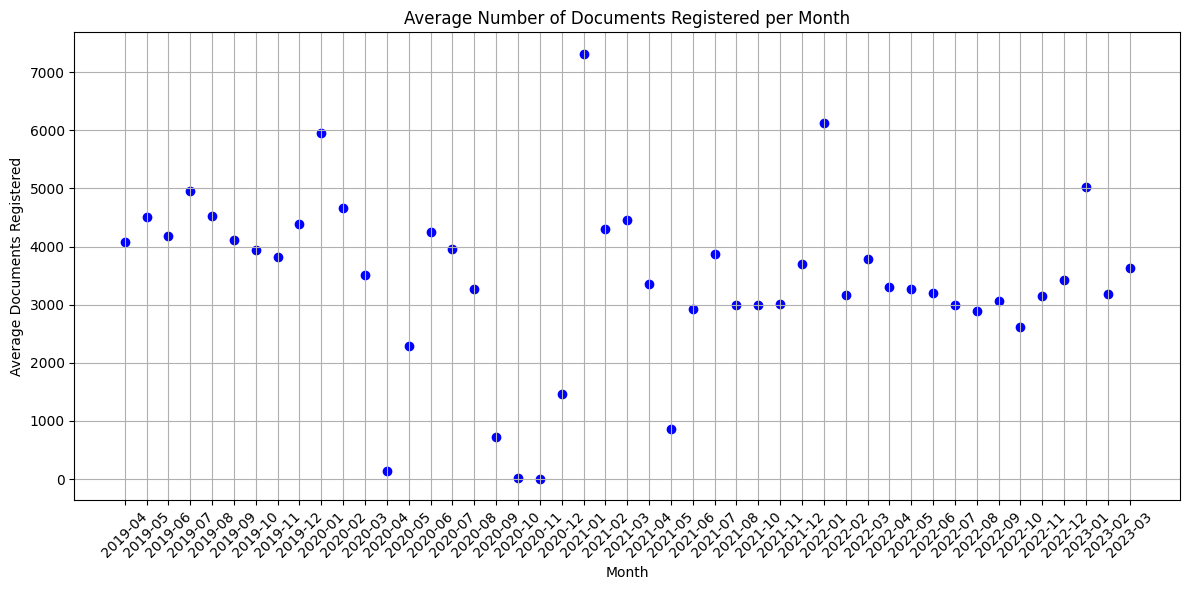

In [27]:
monthly_docs = df_merged.groupby(df_merged['month'].dt.to_period('M'))['documents_registered_cnt'].mean().reset_index()
plt.figure(figsize=(12, 6))
plt.scatter(monthly_docs['month'].astype(str), monthly_docs['documents_registered_cnt'], color='blue', marker='o')
plt.title('Average Number of Documents Registered per Month')
plt.xlabel('Month')
plt.ylabel('Average Documents Registered')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


## 7. Comparison of New vs. Pre-owned Vehicle Registrations

### Question:
- **How do the registrations of brand new vehicles compare to pre-owned vehicles across districts?**
- **Are there districts with a higher preference for new or pre-owned vehicles?**

### Analysis:
- Compare the counts of new and pre-owned vehicle registrations for each district.
- Identify districts with a higher preference for either new or pre-owned vehicles.
- Analyze the overall distribution to see if there are trends or patterns in vehicle preferences across districts.

### Visualization:
- **Type:** Grouped Bar Chart
- **Description:**
  - Plot the number of new vehicle registrations and pre-owned vehicle registrations side by side for each district.
  - Use different colors or patterns for new and pre-owned vehicles to distinguish between them.
- **Purpose:**
  - To visually compare the registration counts of new versus pre-owned vehicles across different districts.
  - To highlight any districts with a notable preference for one type of vehicle over the other.


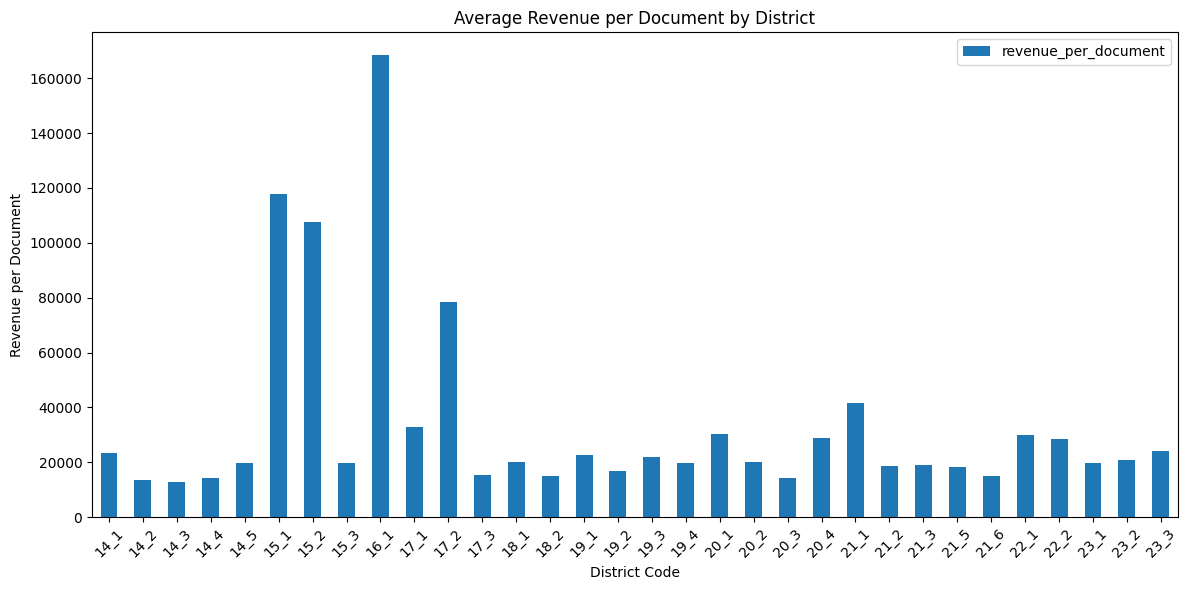

In [40]:
df_merged['revenue_per_document'] = df_merged['documents_registered_rev'] / df_merged['documents_registered_cnt']
revenue_per_document = df_merged.groupby('dist_code')['revenue_per_document'].mean().reset_index()
revenue_per_document.plot(kind='bar', x='dist_code', y='revenue_per_document', figsize=(12, 6))
plt.title('Average Revenue per Document by District')
plt.xlabel('District Code')
plt.ylabel('Revenue per Document')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## 8. Revenue per Document Analysis

### Question:
- **What is the average revenue generated per document registration in each district?**
- **Which districts are more profitable on a per-document basis?**

### Analysis:
- Calculate the revenue per document by dividing the total revenue by the number of documents registered in each district.
- Compare the revenue per document across districts to identify which ones are more profitable.

### Visualization:
- **Type:** Bar Chart or Box Plot
- **Description:**
  - **Bar Chart:** Display the average revenue per document for each district, with bars representing the revenue per document for each district.
  - **Box Plot:** Show the distribution of revenue per document across districts, highlighting the median, quartiles, and potential outliers.
- **Purpose:**
  - To visualize and compare the average revenue generated per document registration in different districts.
  - To identify districts with higher profitability on a per-document basis and understand the overall distribution of revenue per document.


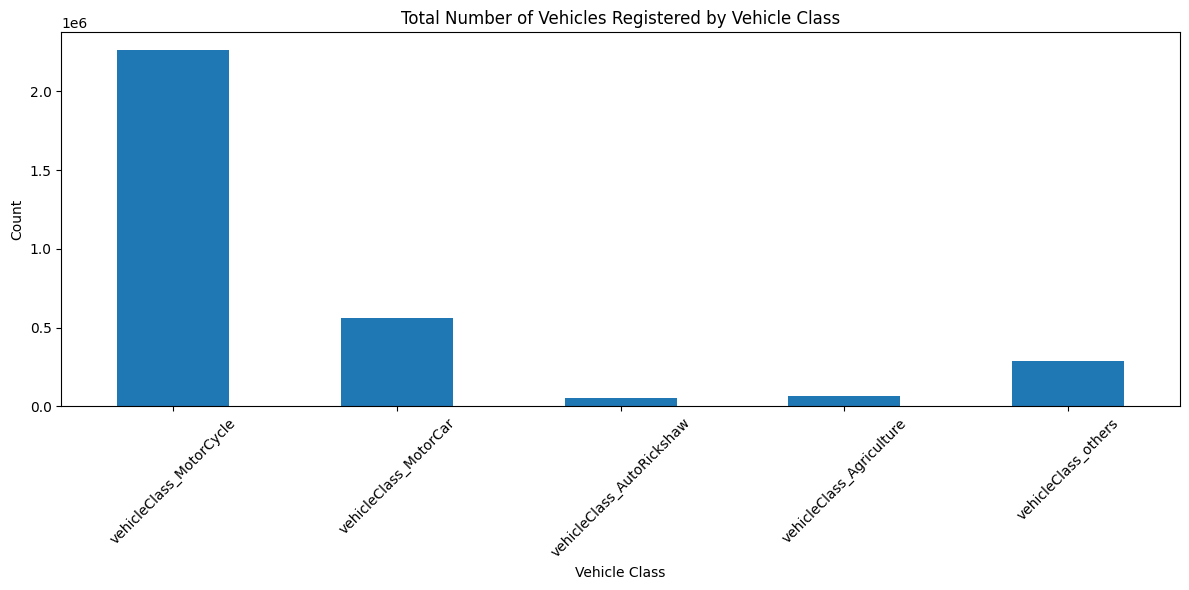

In [29]:
vehicle_classes = ['vehicleClass_MotorCycle', 'vehicleClass_MotorCar', 'vehicleClass_AutoRickshaw',
                   'vehicleClass_Agriculture', 'vehicleClass_others']
vehicle_class_distribution = df_merged[vehicle_classes].sum()
vehicle_class_distribution.plot(kind='bar', figsize=(12, 6))
plt.title('Total Number of Vehicles Registered by Vehicle Class')
plt.xlabel('Vehicle Class')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## 9. Fiscal Year Performance Comparison

### Question:
- **How do key metrics like document registrations, vehicle registrations, and investments compare across different fiscal years?**
- **Are there any significant changes or trends over the years?**

### Analysis:
- Compare the performance metrics such as document registrations, vehicle registrations, and investments for each fiscal year.
- Analyze year-over-year changes to identify any significant trends, increases, or decreases in these metrics.

### Visualization:
- **Type:** Line Charts or Bar Graphs
- **Description:**
  - **Line Charts:** Plot the key metrics (document registrations, vehicle registrations, and investments) over fiscal years with different lines for each metric. This helps in visualizing trends and changes over time.
  - **Bar Graphs:** Display the values for each metric in separate bars for each fiscal year. This provides a clear comparison of metrics across years.
- **Purpose:**
  - To compare and visualize the performance of key metrics across different fiscal years.
  - To identify trends, significant changes, and patterns in document registrations, vehicle registrations, and investments over time.


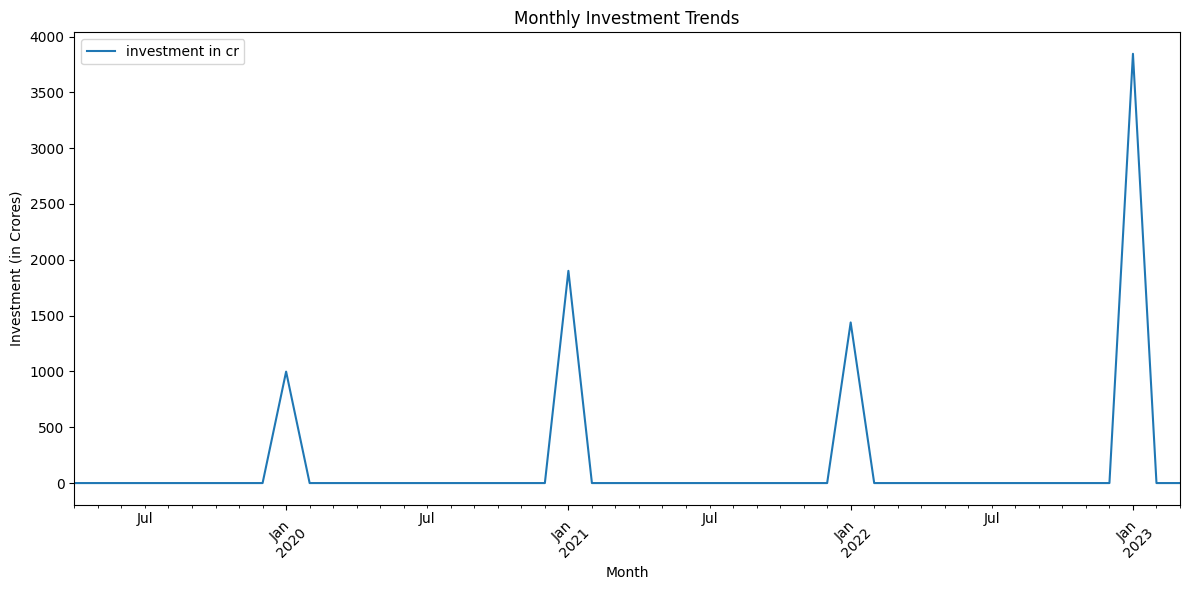

In [30]:
monthly_investment = df_merged.groupby(df_merged['month'].dt.to_period('M'))['investment in cr'].sum().reset_index()
monthly_investment.plot(kind='line', x='month', y='investment in cr', figsize=(12, 6))
plt.title('Monthly Investment Trends')
plt.xlabel('Month')
plt.ylabel('Investment (in Crores)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## 10. Document Registration and Vehicle Registration by Quarter

### Question:
- **How do document registrations and vehicle registrations vary by fiscal quarter?**
- **Are certain quarters more active in terms of registrations?**

### Analysis:
- Aggregate the data by fiscal quarter to examine the trends in document and vehicle registrations.
- Compare the number of registrations in each quarter to identify periods of higher or lower activity.

### Visualization:
- **Type:** Bar Chart or Line Chart
- **Description:**
  - **Bar Chart:** Display the number of document registrations and vehicle registrations for each fiscal quarter as separate bars. This helps in visualizing the volume of registrations in each quarter.
  - **Line Chart:** Plot the number of registrations over quarters with different lines for document registrations and vehicle registrations. This helps in identifying trends and comparing the two types of registrations over time.
- **Purpose:**
  - To visualize and compare the trends in document and vehicle registrations across different fiscal quarters.
  - To determine if certain quarters show higher or lower activity in terms of registrations.


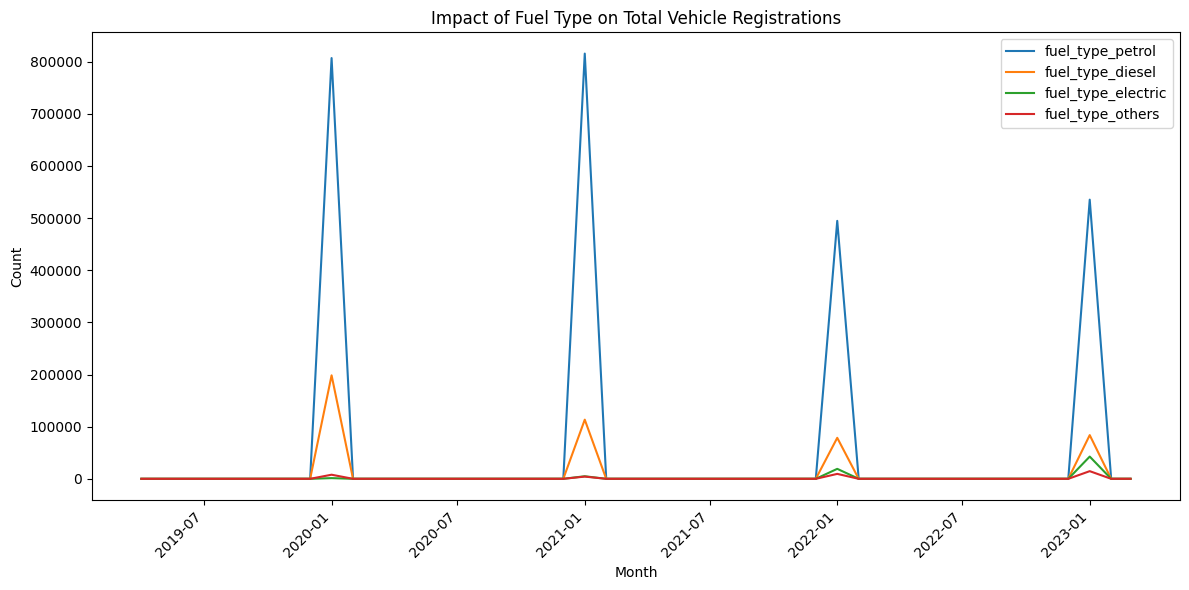

In [31]:
fuel_types = ['fuel_type_petrol', 'fuel_type_diesel', 'fuel_type_electric', 'fuel_type_others']
fuel_type_impact = df_merged.groupby('month')[fuel_types].sum().reset_index()
fuel_type_impact.plot(x='month', kind='line', figsize=(12, 6))
plt.title('Impact of Fuel Type on Total Vehicle Registrations')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Advanced Analysis

### Heatmap of Monthly Revenue and Document Registrations

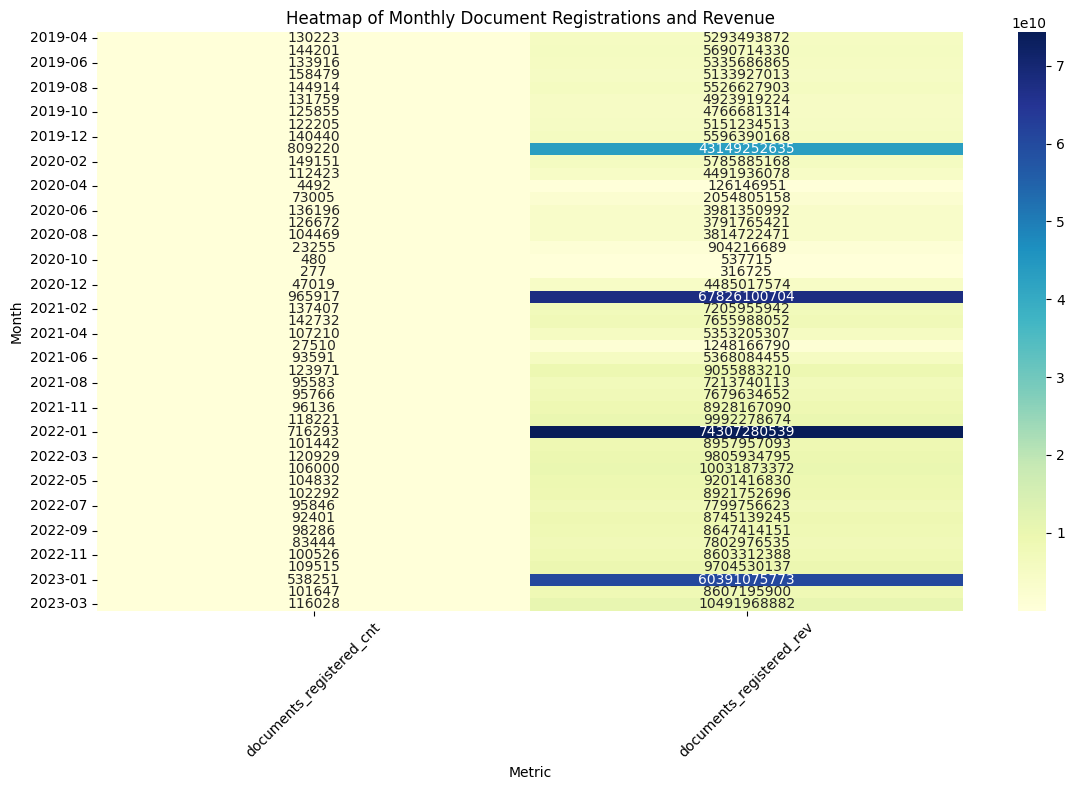

In [32]:
# Create a pivot table for the heatmap
heatmap_data = df_merged.pivot_table(index=df_merged['month'].dt.to_period('M'), 
                                     values=['documents_registered_cnt', 'documents_registered_rev'], 
                                     aggfunc='sum')

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='.0f')
plt.title('Heatmap of Monthly Document Registrations and Revenue')
plt.xlabel('Metric')
plt.ylabel('Month')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Pair Plot for Numerical Variables

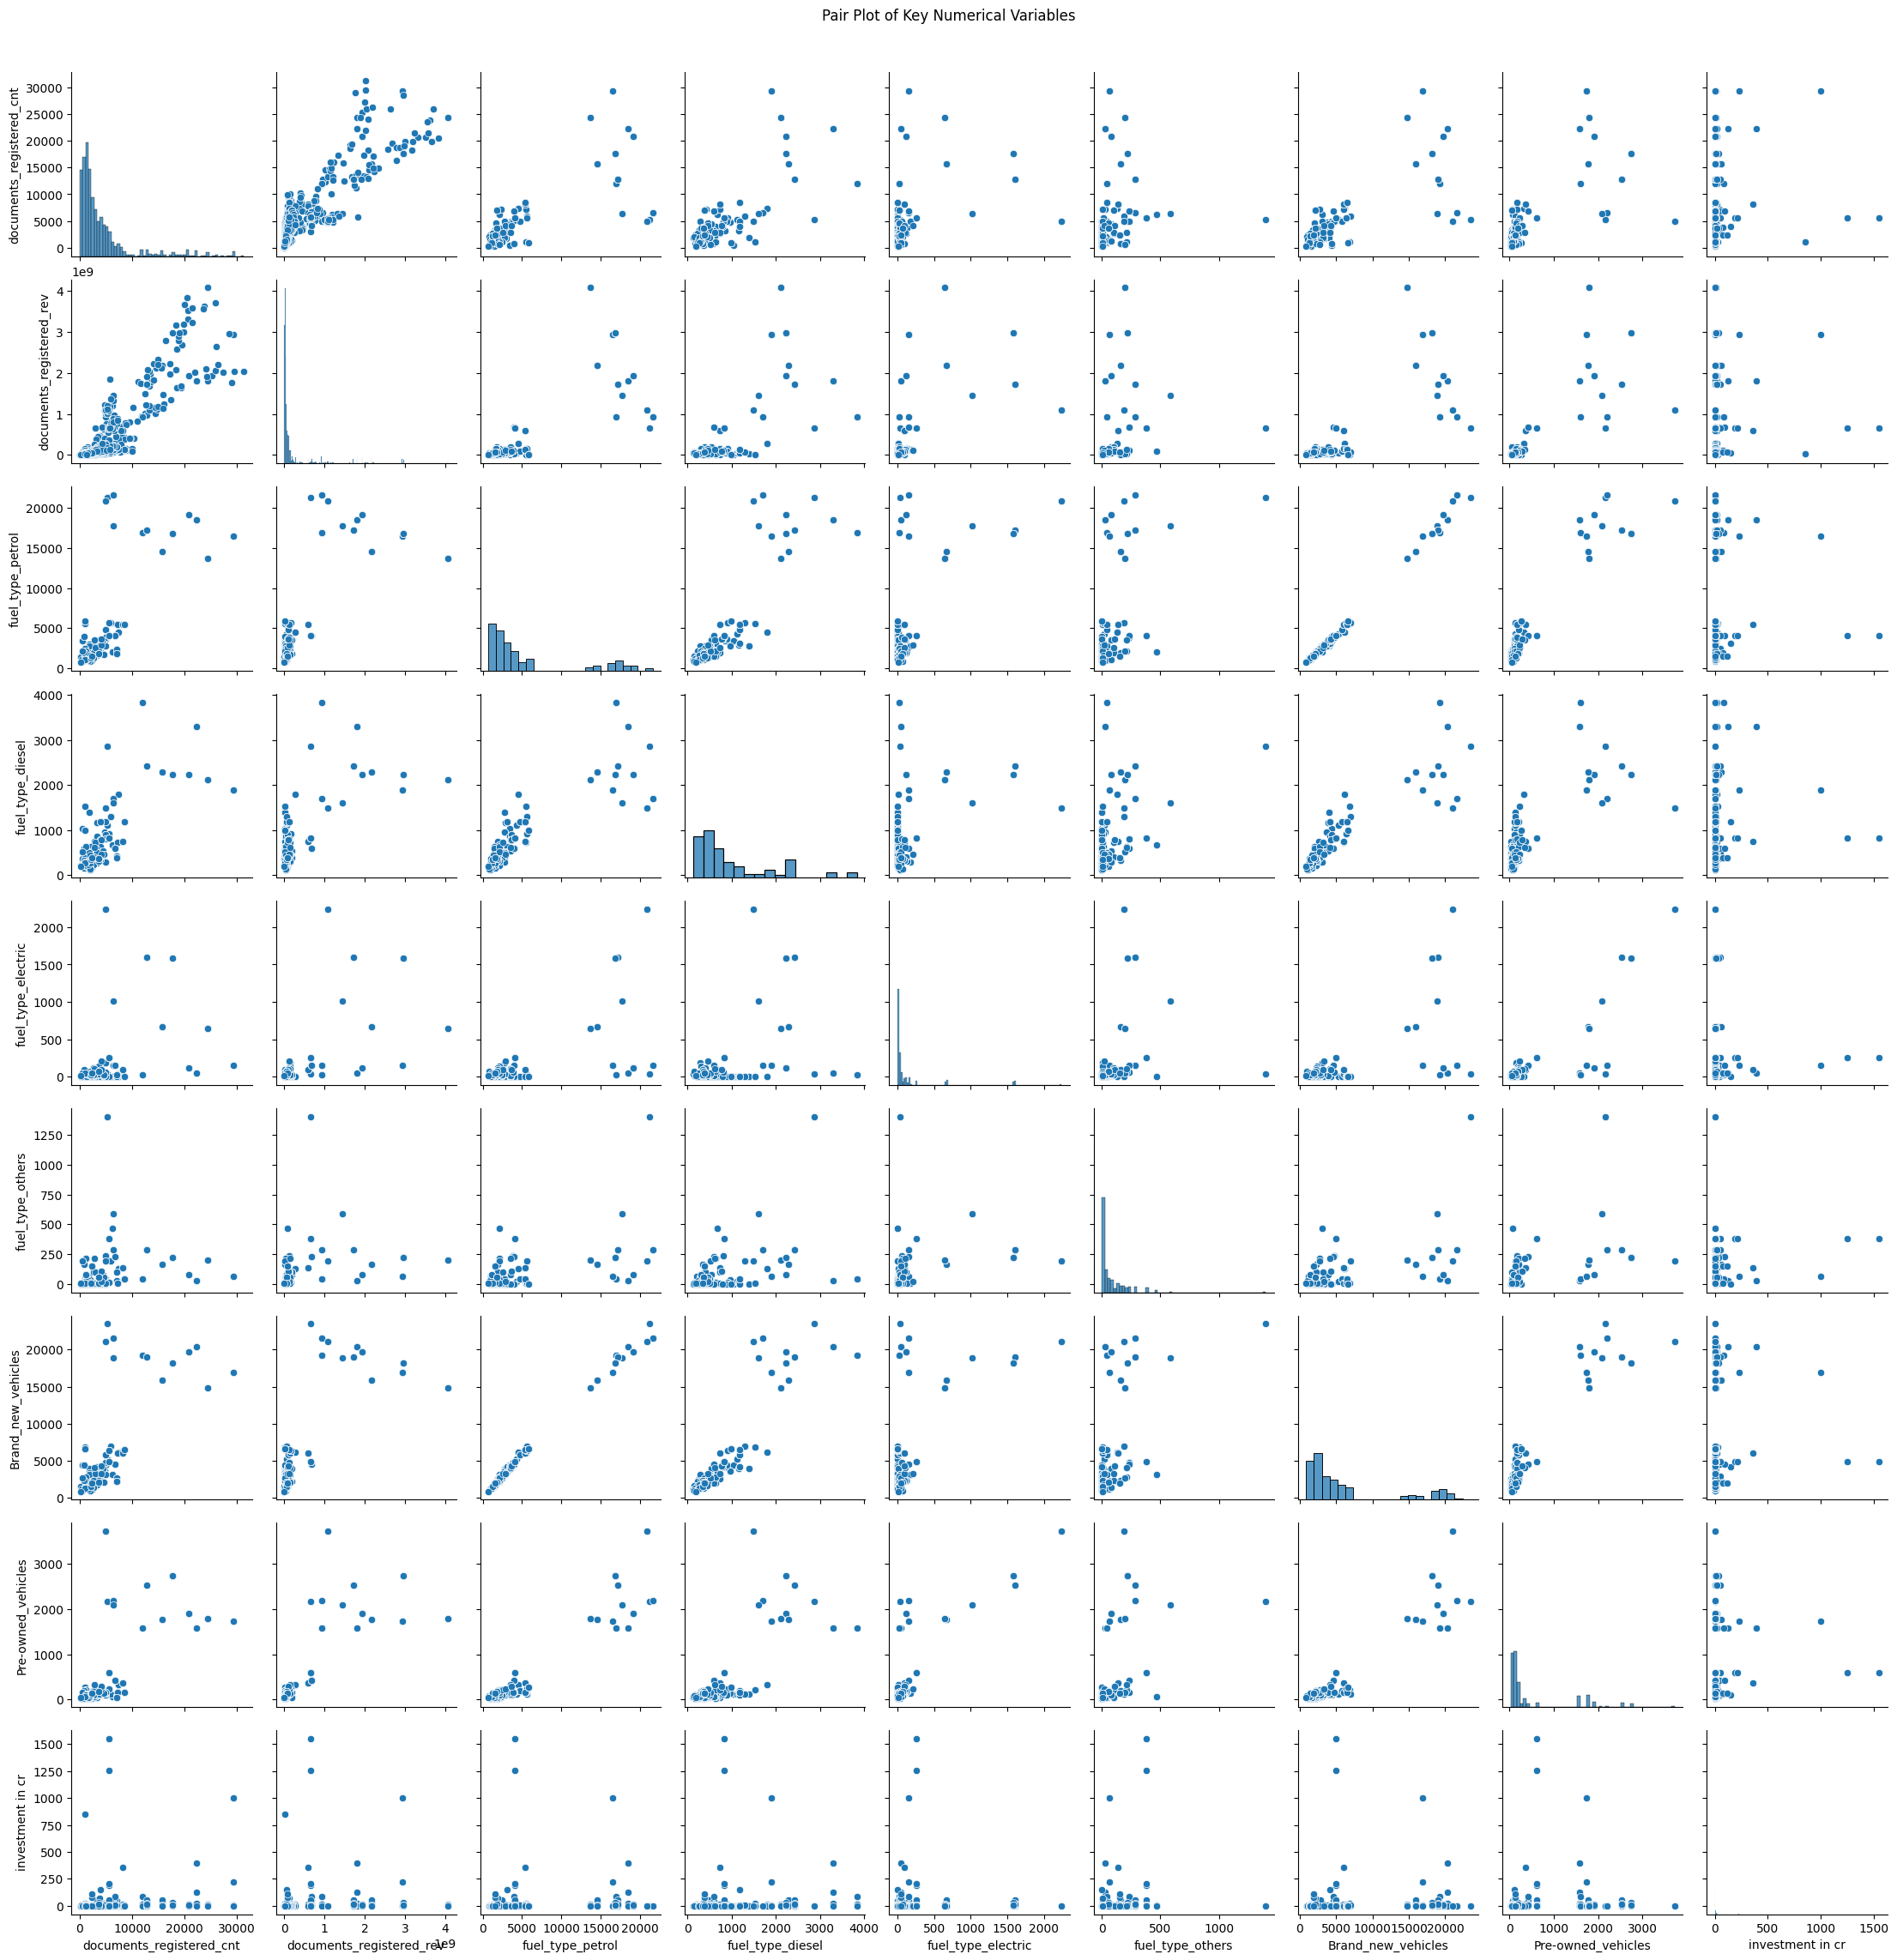

In [33]:
sns.pairplot(df_merged[['documents_registered_cnt', 'documents_registered_rev', 'fuel_type_petrol', 
                        'fuel_type_diesel', 'fuel_type_electric', 'fuel_type_others', 
                        'Brand_new_vehicles', 'Pre-owned_vehicles', 'investment in cr']])
plt.suptitle('Pair Plot of Key Numerical Variables', y=1.02)
plt.show()


## Advanced Scatter Plots with Trend Lines

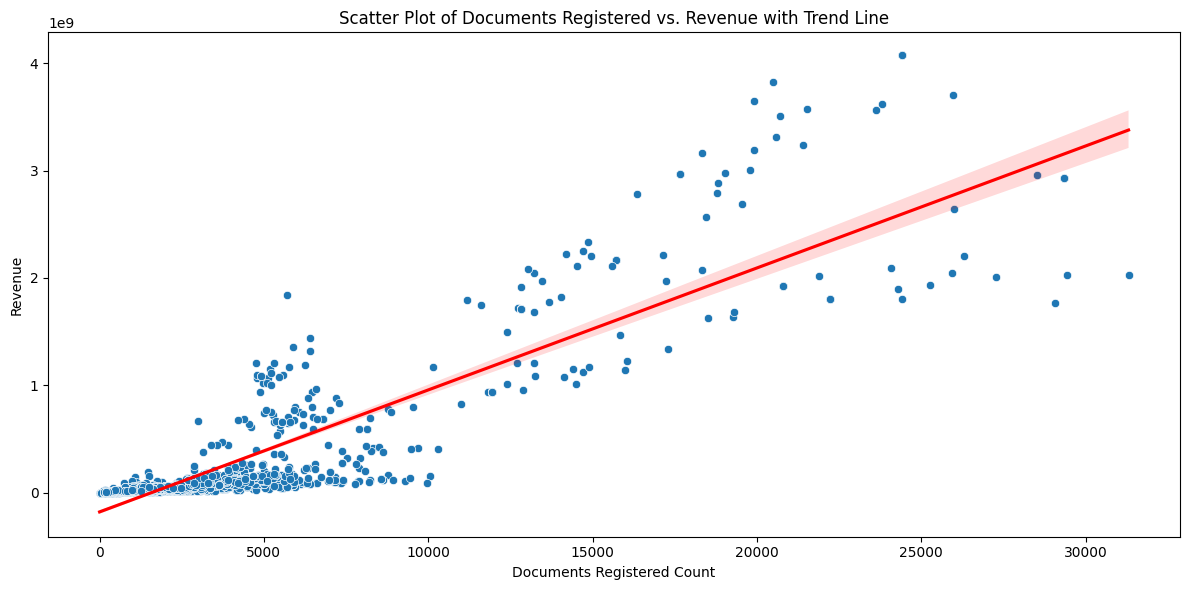

In [35]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='documents_registered_cnt', y='documents_registered_rev', data=df_merged)
sns.regplot(x='documents_registered_cnt', y='documents_registered_rev', data=df_merged, scatter=False, color='red')
plt.title('Scatter Plot of Documents Registered vs. Revenue with Trend Line')
plt.xlabel('Documents Registered Count')
plt.ylabel('Revenue')
plt.tight_layout()
plt.show()


# Conclusion and Key Takeaways

## Summary and Reflections

The analysis of Telangana's growth presents a compelling story of a state that has leveraged its strategic advantages to foster rapid development across various sectors. Over the past few years, Telangana has witnessed an unprecedented rise in key economic indicators, painting a picture of robust growth and diversification. However, this journey is not without its challenges and areas requiring focused attention.

### Key Takeaways

1. *Stamp Registration and Real Estate Boom:*
   - The consistent increase in stamp registration revenue highlights a thriving real estate market, especially in urban districts like Hyderabad and Ranga Reddy. This surge is indicative of rising property values and increased investor confidence in the state's urban centers.
   - The adoption of digital tools such as e-challan for stamp duty collection has streamlined processes, enhancing efficiency and transparency in revenue collection. However, there is a marked disparity in revenue generation across different districts, suggesting a need for targeted efforts to stimulate real estate activity in underdeveloped areas.

2. *Transportation Growth and Sustainability Initiatives:*
   - Telangana's transportation sector has seen significant growth, with a noticeable increase in vehicle registrations, particularly in the personal vehicle segment. The shift towards electric vehicles, although still in its nascent stage, is gaining momentum, reflecting the state's commitment to sustainable development.
   - The expansion of public transportation systems, including the metro and bus services, has improved connectivity within the state. However, there remains a considerable opportunity to enhance these services, particularly in rural areas, to ensure inclusive growth.

3. *Industrial Investments and Sectoral Development:*
   - The state's strategic focus on attracting investments in sectors like Pharmaceuticals and Chemicals has paid off, with these industries showing remarkable growth. This sectoral focus has not only diversified Telangana's industrial base but has also positioned the state as a key player in India's manufacturing landscape.
   - While the state has made significant strides in attracting industrial investments, there is a need for balanced development. Districts outside the Hyderabad metropolitan area require more attention to ensure that the benefits of industrial growth are equitably distributed across the state.

### Conclusion

Telangana's journey since its formation is a testament to its resilience, strategic planning, and visionary leadership. The state has successfully navigated the challenges of its early years to emerge as a frontrunner in various economic domains. However, the path ahead requires continued innovation and inclusive policies to sustain this growth. Future efforts should focus on reducing regional disparities, enhancing sustainable practices, and further diversifying the economy to shield it from sector-specific downturns.

In conclusion, while Telangana’s growth story is indeed inspiring, the state's true potential lies in its ability to balance rapid urban development with rural upliftment, to foster an inclusive growth environment that benefits all its citizens. The insights gained from this analysis provide a roadmap for the next phase of Telangana’s development, one that promises even greater achievements on the horizon.